# Determining Customer Attrition using Different Classification Techniques for Fraud Detection
## By: Nimra Irshad

## Introduction
Delving into the domain of fraud detection within financial transactions, this study focuses on the critical task of determining customer attrition. Through the exploration of various classification techniques, we aim to uncover patterns indicative of potential customer attrition. By harnessing advanced machine learning algorithms, our goal is to construct a robust framework capable of effectively discerning fraudulent activities and predicting customer attrition. This project not only advances fraud detection methodologies but also provides valuable insights into customer behavior, equipping businesses with proactive strategies to mitigate customer attrition and safeguard their financial assets.

The prediction of Customer attrition is a massive challenge within the financial space as it directly corelates to the customer retention, which is a crucial element for business success. By including modern machine learning techniques, the project aims to develop a reliable model that can accurately forecast ‘Customer attrition’ events. This would enable us to gain valuable insights into important factors for financial institutions to uncover ways to reduce Customer attrition and to help promote longer customer relationships.

This project incorporates a large data set of credit card data (approximately 5.5 million records) to determine the likelihood of individuals to ‘Customer attrition’. The goal is to produce a fully trained model that can accurately predict ‘Customer attrition’.


## Dataset
The dataset incorporates a combination of fraud and legitimate transactions that span from the years 2019 – 2020. It includes the data of over 800 merchants and 1000 customers, and is generated by Brandon Harris using the Github tool, i.e. Sparkov Data Generation. The files have been converted into regular formatting and have been combined. The exact dates for the transaction range between 1st January 2019 till 31st December 2020. The Dataset can be found under this URL link. [Kaggle - Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection)

In [1]:
import pandas as pd
import numpy as np

# Loading the Kaggle Dataset
Dataset = pd.read_csv("Dataset1.csv")

# Printing out the information about the Credit Card Fraud dataframe and renaming the unnamed column as IDs
Dataset.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
Dataset.head(5)

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,6/7/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [2]:
# Total Number of observations and variables in the Dataset
# Checking the Datatypes for each variable for further cleansing if required
Dataset.shape
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [3]:
Dataset.describe()

,ID,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178627e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309920e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800000e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.520000e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.640000e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.990000e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [5]:
Dataset.isnull().sum()

ID                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
print(Dataset.dtypes)

ID                         int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


## Pre-processing
We've changed some variable datatypes into strings for ensuring consistent datatypes across columns for further analysis.


In [7]:
# Converting Gender object types to numerical
if Dataset.gender[0] == 'M' or Dataset.gender[0] == 'F':
    Dataset['gender'] = Dataset['gender'].map({'M' : 0, 'F' : 1})

Dataset.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,0,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,1,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,1,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,0,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,0,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,6/7/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
from datetime import datetime
Dataset['dob'] = pd.to_datetime(Dataset['dob'])
current_year = datetime.now().year
Dataset['age'] = current_year - Dataset['dob'].dt.year

C:\Users\pc\AppData\Local\Temp\ipykernel_24052\2517608735.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Dataset['dob'] = pd.to_datetime(Dataset['dob'])


In [9]:
# Tranforming variable into string datatype for Data Exploratory Analysis
Dataset['trans_date_trans_time'] = pd.to_datetime(Dataset['trans_date_trans_time'])
Dataset['first'] = Dataset['first'].astype(str)
Dataset['last'] = Dataset['last'].astype(str)
Dataset['street'] = Dataset['street'].astype(str)
Dataset['city'] = Dataset['city'].astype(str)
Dataset['state'] = Dataset['state'].astype(str)
Dataset.info()

C:\Users\pc\AppData\Local\Temp\ipykernel_24052\4231438993.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Dataset['trans_date_trans_time'] = pd.to_datetime(Dataset['trans_date_trans_time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  int64         
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In the pre-processing stage, we have utilized ‘MinMaxScaler’ to bring the features within our desired range (between 0 and 1). This helps us ensure that the features span across a similar scale whilst maintaining the original shape of the entire distribution. This also helps prevent domination from larger magnitude features during the entire training procedure for the model. This is especially beneficial for algorithms that employ ‘distance’ based metrics and descent based gradient algorithms.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Scaling some variables from the Dataframe that would further help in the analysis of the Dataset
columns_numerical = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaling method on the selected numerical columns stated above
Dataset[columns_numerical] = scaler.fit_transform(Dataset[columns_numerical])

# Printing to visualise the normalized DataFrame
print(Dataset.head(7))

   ID trans_date_trans_time        cc_num  \
0   0   2020-06-21 12:14:00  2.290000e+15   
1   1   2020-06-21 12:14:00  3.570000e+15   
2   2   2020-06-21 12:14:00  3.600000e+15   
3   3   2020-06-21 12:15:00  3.590000e+15   
4   4   2020-06-21 12:15:00  3.530000e+15   
5   5   2020-06-21 12:15:00  3.040000e+13   
6   6   2020-06-21 12:15:00  2.130000e+14   

                               merchant        category       amt     first  \
0                 fraud_Kirlin and Sons   personal_care  0.000082      Jeff   
1                  fraud_Sporer-Keebler   personal_care  0.001267    Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  0.001769    Ashley   
3                     fraud_Haley Group        misc_pos  0.002594     Brian   
4                 fraud_Johnston-Casper          travel  0.000096    Nathan   
5                   fraud_Daugherty LLC       kids_pets  0.000815  Danielle   
6                   fraud_Romaguera Ltd  health_fitness  0.005839     Kayla   

      

## Exploratory Data Analysis (EDA)

To begin our comprehensive analysis, a bar graph was created to help envision the distribution of transactions (legitimate vs fraudulent) within the dataset. This has helped uncover that a high percentage of the transactions (around 99.61%) are genuine and that a small portion (around 0.39%) of all transactions have been determined to be fraudulent. These striking results depict the fundamental importance of correctly determining fraudulent activities to ensure mitigation and to improve the overall security of transactions. 

[Kaggle Implementation Example 1](https://www.kaggle.com/code/zain280/credit-card-fraud-detection-model)

[Kaggle Implementation Example 2](https://www.kaggle.com/code/jenildesai/credit-card-churn-prediction)

[MA336 Implementation Example 3: Lab 3-6](https://colab.research.google.com/github/mariogutierrezroig/Teaching-Notebooks/blob/main/Decision_Trees/decision_trees_titanic.ipynb)

In [11]:
print(Dataset.columns)

Index(['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age'],
      dtype='object')


Comparing the Fraudulent attempts with the original transactions. 

In [12]:
# Counting the number of Original transactions and the fraudulent transactions with respect to the total number of Transactions
fraud = Dataset['is_fraud'].sum()
original = len(Dataset) - fraud
total_transactions = len(Dataset)

# Calculating the percentage of original and fraud transactions
percent_fraud = (fraud / total_transactions) * 100
percent_original = (original / total_transactions) * 100

print("Original transactions: {} ({:.2f}%)".format(original, percent_original))
print("Fraudulent transactions: {} ({:.2f}%)".format(fraud, percent_fraud))

Original transactions: 553574 (99.61%)
Fraudulent transactions: 2145 (0.39%)


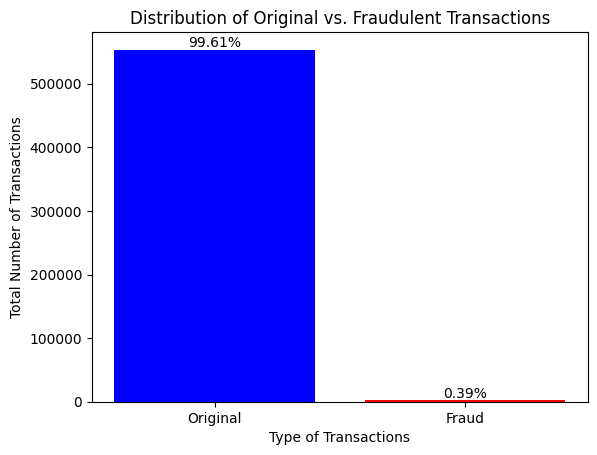

In [13]:
import matplotlib.pyplot as plt

# Creating a bar plot
bars = plt.bar(['Original', 'Fraud'], [original, fraud], color=['blue', 'red'])
plt.xlabel('Type of Transactions')
plt.ylabel('Total Number of Transactions')
plt.title('Distribution of Original vs. Fraudulent Transactions')

# Add labels above the bars with percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f%%' % (height / total_transactions * 100), ha='center', va='bottom')

plt.show()

In [14]:
# Analyzing the Different type of categories for the transactions
# Obtaining the top 7 most frequent categories
frequent_categories = Dataset['category'].value_counts().head(7)  
print("Most Frequent Transaction Categories Include: ")
print(frequent_categories)

Most Frequent Transaction Categories Include: 
category
gas_transport    56370
grocery_pos      52553
home             52345
shopping_pos     49791
kids_pets        48692
shopping_net     41779
entertainment    40104
Name: count, dtype: int64


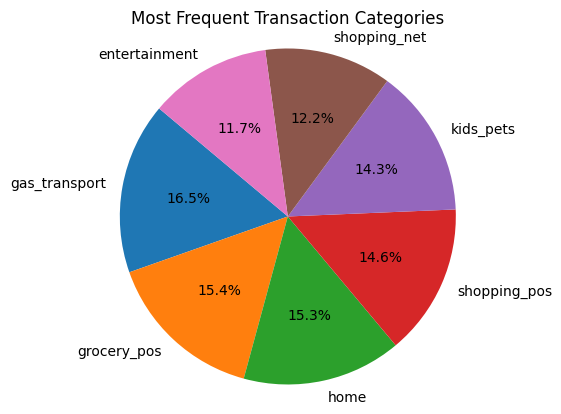

In [15]:
# Visualizing through pie chart
plt.pie(frequent_categories, labels=frequent_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Frequent Transaction Categories')
plt.axis('Equal')
plt.show()

An analysis was also conducted to uncover similar categories for transactions within the dataset. For example, after conducting our tests, we were able to determine that the top seven categories include ‘gas/transport’, ‘entertainment’, ‘internet shopping’, ‘grocery’, ‘home’, ‘shopping’ and ‘kids/pets’. The percentages are mentioned below.
- Gas: 16.5%
- Shopping: 14.6%
- Entertainment: 11.7%
- Home: 15.3%
- Internet Shopping: 12.2%
- Kids/Pets: 14.3%
- Grocery: 15.4%



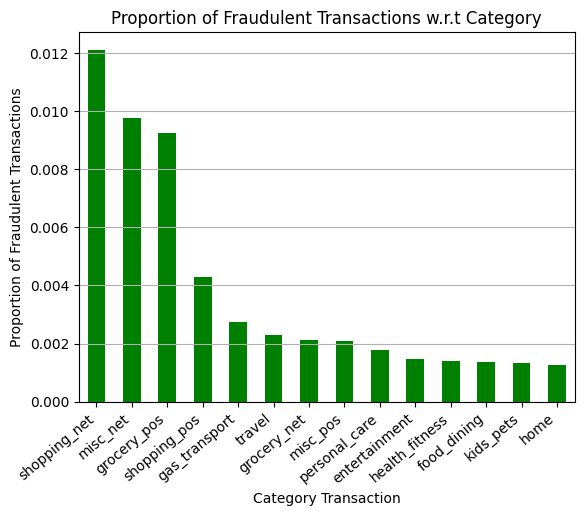

In [16]:
# Grouping the data by the category of transactions and calculating the proportions
fraud_transactions = Dataset[Dataset['is_fraud'] == 1]
sum_category = Dataset['category'].value_counts()
sum_fraud = fraud_transactions['category'].value_counts()
proportion_fraud = (sum_fraud / sum_category).sort_values(ascending=False)

# Plotting the proportions with the help of Bar plots
proportion_fraud.plot(kind='bar', color='green')
plt.title('Proportion of Fraudulent Transactions w.r.t Category')
plt.xlabel('Category Transaction')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y')
plt.show()

It was also seen that the regular occurrence of fraud transactions was dependent upon the transaction category. Some categories such as ‘Internet shopping’ are seen to have a larger rate of fraudulent transactions (approximately 1.2%). Other categories were seen to have lower frequencies (closer to 0.7%). This includes health and fitness, dining, entertainment, kids and pets and more. This indicates that some transaction types seem to be more prone to be fraudulent as compared to the others which identifies an emerging need to carefully monitor and implement safeguards to reduce the overall frequency.

## Methodology and Results

 A model was set up using Random Forest that were able to deliver an incredible accuracy rate of around 99.6%. This showcases the ability of the model to determine the differences between legitimate and fraud transactions using features like amount, unusual amount, gender and age from the dataset. The confusion matrix consisted of around 110,688 transactions and our model was able to determine the exact number of fraudulent transactions (123) and was also able to classify legitimate transactions (110,565). 

In [17]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Feature Engineering: Create new features based on combinations of transaction attributes
Dataset['unusual_amount'] = (Dataset['amt'] > Dataset['amt'].mean() + 3 * Dataset['amt'].std()).astype(int)


# Define features and target variable
features = ['amt', 'unusual_amount', 'age', 'gender']
target = 'is_fraud'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Dataset[features], Dataset[target], test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9958972144245304
Confusion Matrix:
[[110565    153]
 [   303    123]]


Decision Tree Classifier is applied with 80% Training set and 20% Testing Set.

Accuracy on test set: 1.0
Precision: 0.6426666666666667
Confusion Matrix:
[[110581    134]
 [   188    241]]


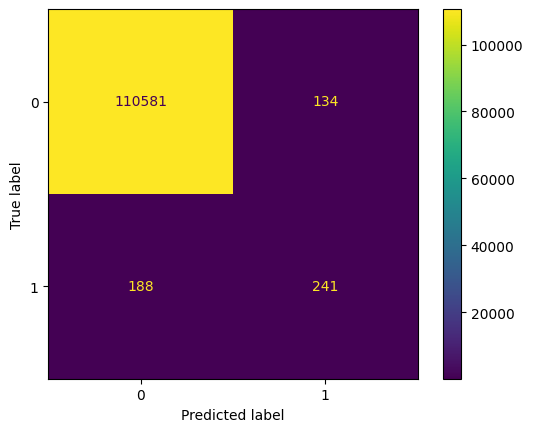

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 1: Preparing the Data
X = Dataset.drop(['is_fraud', 'trans_date_trans_time', 'dob', 'first', 'last', 'street', 'trans_num', 'unusual_amount'], axis=1)
y = Dataset['is_fraud']

# Step 2: Feature Engineering
# Using Label Encoder for Categorical Variables
cat_columns = ['merchant', 'category', 'city', 'state', 'job']
for col in cat_columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


X_names = ['ID', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age'] 
y_names = ['Not Fraud','Fraud'] # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train.shape, X_test.shape

decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=42) 
decision_tree.fit(X_train, y_train)
#decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test)


from sklearn import metrics

# Printing the model accuracy
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_test, y_pred),2))

precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Print out the feature importances
X_names = ['ID', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age'] 
y_names = ['Not Fraud','Fraud'] # Target labels

feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)  
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)



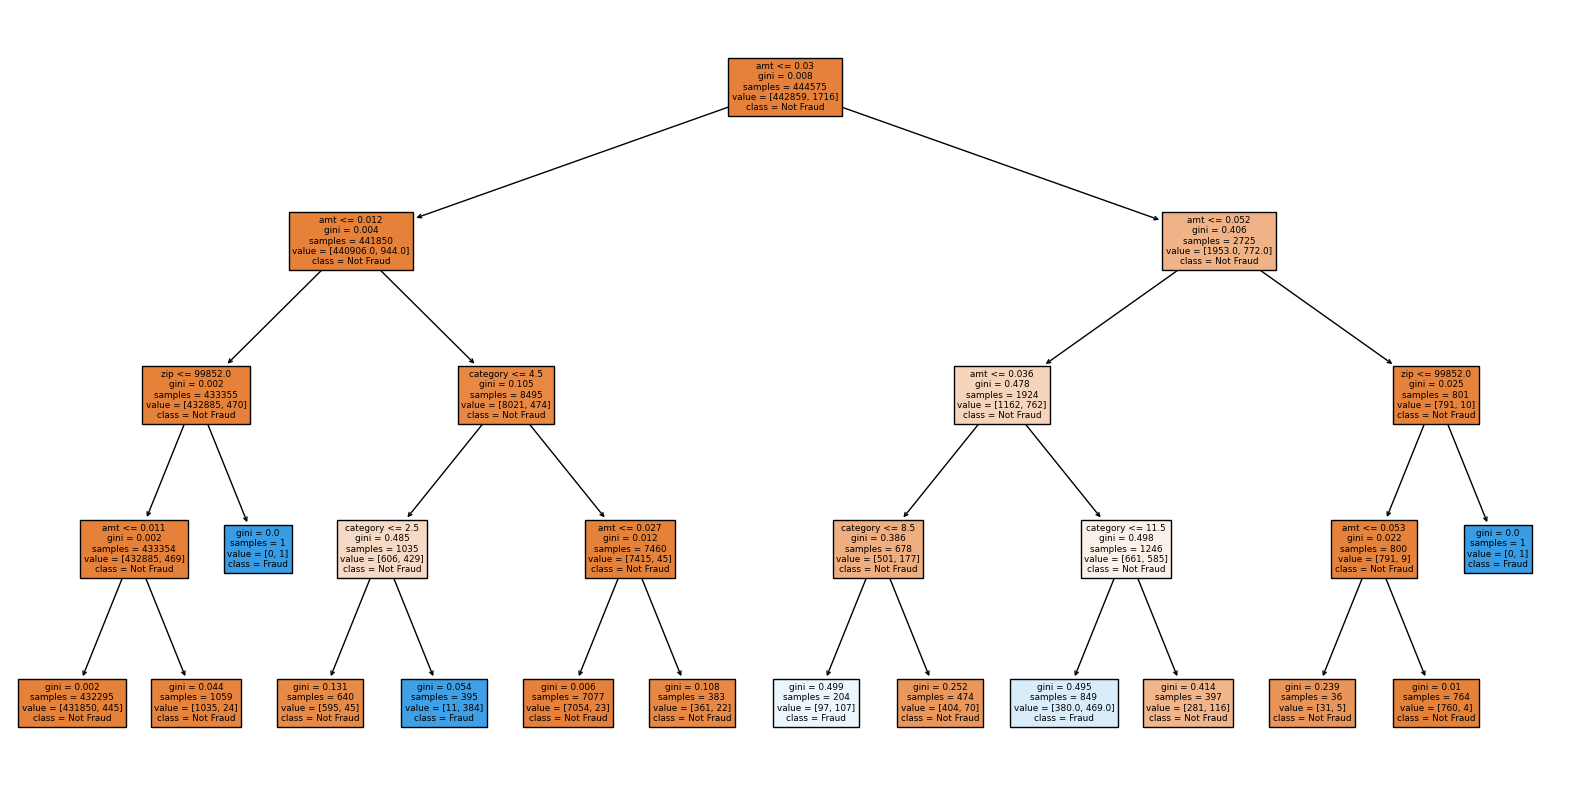

In [19]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True) # _ stops annotations print-out

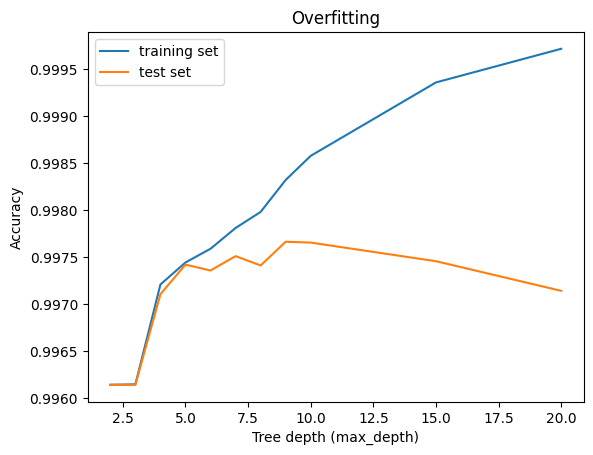

In [20]:
# Plot accuracy as a function of max_depth 
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

# Accuracy using k-fold cross-validation

In [21]:
# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 3
from sklearn.model_selection import cross_val_score
from math import *

maxDepth = 3
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=70)
cv_scores = cross_val_score(decision_tree, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.99614014 0.99614014 0.99612215 0.99614014 0.99614011]
Average performance for a tree depth of 3 is: 99.6 +/- 0.0 %


## Feature Importance

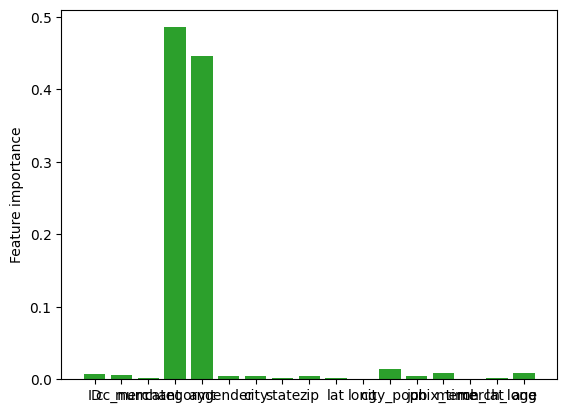

In [22]:
# Plot a histogram of feature importances using a fixed tree depth

def get_feature_importances(X,y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, 
                                                                        random_state=randomState, stratify=y)  
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_train,y_train)
    return decision_tree.feature_importances_

maxDepth = 6

# Get feature importances for different train/test splits (by changing random_state in train_test_split()) and compute the average importance for each feature.
import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,y,randomState,maxDepth)
    # Commented out the below 2 lines and replaced with 1 (better to use less lines of code!)
    #tmp = zip(feature_importances_summed,feature_importances)
    #feature_importances_summed = [(x + y) for (x, y) in tmp]
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_names, feature_importances_mean,color='tab:green')
ax.set_ylabel('Feature importance')    
plt.show()

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features=None,criterion='gini',max_depth=None,random_state=70,oob_score=True)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),2))
y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(y_test, y_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method 

Accuracy on training set: 1.0
Accuracy on test set: 1.0
OOB score: 1.0


## Conclusion
In conclusion, we are able to determine several key items:
- Detecting fraud transactions is a seamless process by utilizing items such as Random Forests/Decision Trees and more. Their ability to handle datasets with large dimensions is particularly useful when working with transaction data for credit cards because these are typically very large.
- The model was able to determine different aspects of interactions and other non-linear processes which makes them ideal for the detection of patterns that indicate any form of activity that seems fraudulent. 
- Noise and overfitting in data have been minimized using Random Forests, which has helped minimize the occurrence of positives that are false. 
- The largest benefit of utilizing these datasets is that they include all types of transactions (both fraudulent and legitimate), allowing the algorithm to train the model effectively, thus producing extremely good accuracy for fraud detection.


To conclude, the utilization of Random Forests & Decision Trees, paired with K-fold cross validation turned out to be very effective in producing excellent results for robustness, and is able to ensure a high percentage of accuracy. It has been proven in this project that these techniques are very effective in handling large scale complex transaction data for credit cards by utilizing the datasets for training.
